In [33]:
import math
import matplotlib.pyplot as plt
import numpy as np


In [34]:
def f(h):
    return h**3 - 10*h + 5*math.exp(-h/2) - 2

In [35]:
X=np.linspace(-20,80,500)
y=[f(i) for i in X]

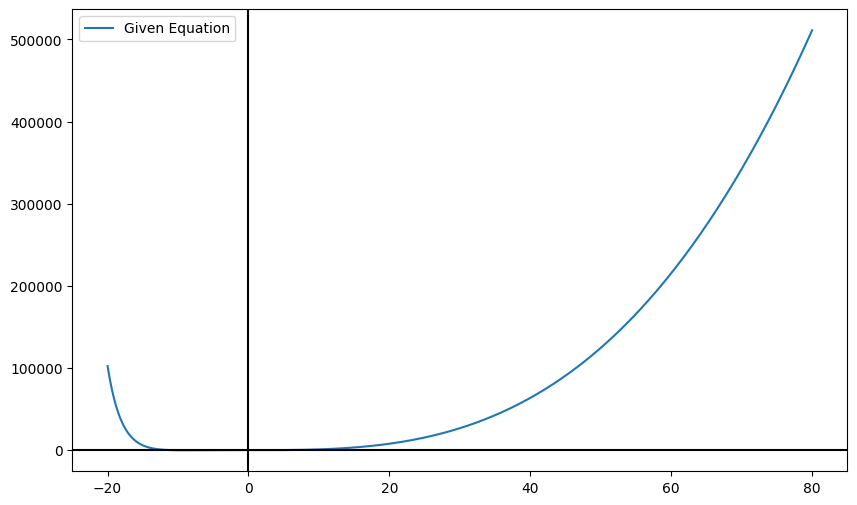

In [36]:
plt.figure(figsize=(10,6))
plt.plot(X,y,label='Given Equation')
plt.axvline(0,color='black')
plt.axhline(0,color='black')
plt.legend()
plt.show()

In [37]:
def value(x1,x0):
    x=x1-x0
    # print(x)
    y=(f(x1)-f(x0))
    # print(y)
    z=x/y
    # print(z)
    z=f(x1)*z
    # print(z)
    # print(x1-z)
    return x1-z

In [38]:
def Secent_Method(x_i,x_ii,threshold=0.005,max_iterations=100,verbose=True):
    iteration = 0
    results = []
    xr_old = x_ii
    converged = False
    if verbose:
        print("="*80)
        print(f"{'Iter':<5} {'xi':<15} {'x_i+1':<15} {'x_i+2 (root)':<15} {'f(x_i+2)':<15} {'εa (%)':<12}")
        print("="*80)
    
    while iteration<max_iterations:
        iteration+=1
        xr=value(x_ii,x_i)
        ea = abs((xr - xr_old) / xr) * 100 if xr != 0 else 0
        results.append({
            'Iteration': iteration,
            'x_i': x_i,
            'x_i+1': x_ii, 
            'xr': xr,
            'f(xr)': f(xr),
            'ea(%)': ea if ea != float('inf') else None,
            
        })
        if verbose:
            ea_str = f"{ea:.8f}" if ea != float('inf') else "N/A"
            print(f"{iteration:<5} {x_i:<15.10f} {x_ii:<15.10f} {xr:<15.10f} {f(xr):<15.10f} {ea_str:<12}")
        if iteration > 1 and ea < threshold:
            converged = True
            if verbose:
                print("="*80)
                print(f"CONVERGENCE ACHIEVED!")
                print(f"Approximate relative error = {ea:.10f}% < {threshold}%")
            break
        x_i=x_ii
        x_ii=xr
        xr_old=xr
    if not converged and verbose:
        print(f"Maximum iterations ({max_iterations}) reached without convergence")
    
    return results, xr

In [39]:
x_i=1.5
x_ii=2
thres=0.001
results,final_root=Secent_Method(x_i,x_ii,thres)
print(f"\nFINAL RESULT:")
print(f"Root: x = {final_root:.10f}")
print(f"f(x) = {f(final_root):.10f}")
print(f"Total iterations: {len(results)}")

Iter  xi              x_i+1           x_i+2 (root)    f(x_i+2)        εa (%)      
1     1.5000000000    2.0000000000    -4.7751955490   -8.6978616841   141.88310153
2     2.0000000000    -4.7751955490   -21.7934224087  259857.4845882563 78.08882213 
3     -4.7751955490   -21.7934224087  -4.7757651583   -8.7156297846   356.33362794
4     -21.7934224087  -4.7757651583   -4.7763359120   -8.7334384799   0.01194961  
5     -4.7757651583   -4.7763359120   -4.4964365481   -0.5900944856   6.22491524  
6     -4.7763359120   -4.4964365481   -4.4761540853   -0.0460544028   0.45312253  
7     -4.4964365481   -4.4761540853   -4.4744371223   -0.0002859090   0.03837272  
8     -4.4761540853   -4.4744371223   -4.4744263967   -0.0000001403   0.00023971  
CONVERGENCE ACHIEVED!
Approximate relative error = 0.0002397092% < 0.001%

FINAL RESULT:
Root: x = -4.4744263967
f(x) = -0.0000001403
Total iterations: 8


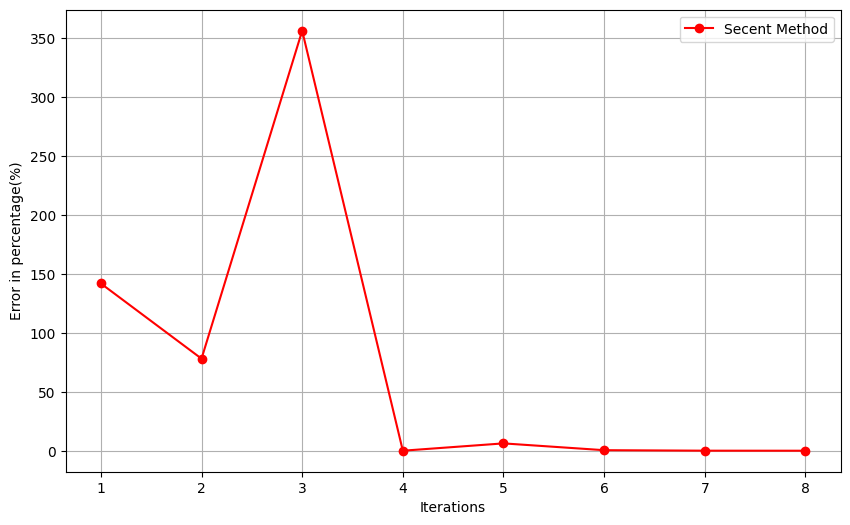

In [40]:
plt.figure(figsize=(10,6))
x=[]
y=[]
for i in range(len(results)):
    x.append(i+1)
    y.append(results[i]['ea(%)'])
    
    
plt.plot(x,y,color='red',label="Secent Method",marker='o')
plt.xlabel("Iterations")
plt.ylabel("Error in percentage(%)")
plt.legend()
plt.grid()
plt.show()